In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as stats

The dataset was obtained from https://www.kaggle.com/crawford/80-cereals

Important abbreviations: 

**mfr: Manufacturer of cereal**
- A = American Home Food Products;
- G = General Mills
- K = Kelloggs
- N = Nabisco
- P = Post
- Q = Quaker Oats
- R = Ralston Purina

**type:**
- cold
- hot

In [2]:
cereal = pd.read_csv('C:\Inna\'s files\data\cereal.csv', encoding='ISO-8859-1')
cereal.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [3]:
#get the adequate count per cup
cereal['calories_new'] = cereal['calories'] / cereal['cups']
cereal['sugars_new'] = cereal['sugars'] / cereal['cups']

# One variable: 'calories' plotted in four different ways

c:\users\owner\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


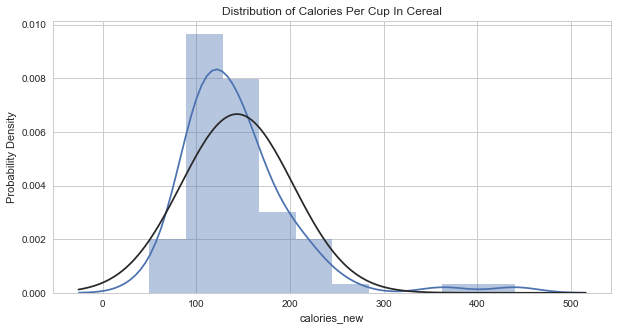

In [24]:
plt.figure(figsize=(10,5))
sns.distplot(cereal['calories_new'], bins=10, fit = stats.norm)
plt.title('Distribution of Calories Per Cup In Cereal')
plt.ylabel('Probability Density')
plt.show()

This histogram helps us learn about the distrbition of calories in all brands of cereal. It is valuable if we are trying to see where the data clusters and a probability density. The downside is that it is hard to see the interquartile range and outliers very clearly. Qualitative way to display data. No: hard numbers, we can only approximate.To assess those, we can draw a boxplot. 


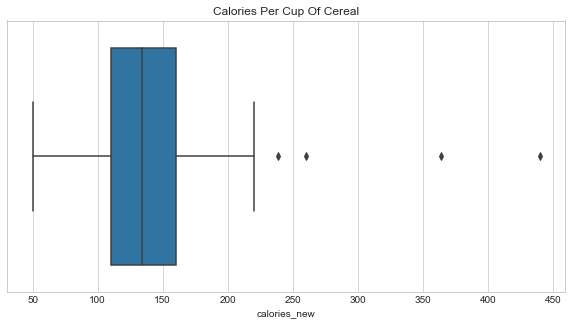

In [5]:
plt.figure(figsize=(10,5))
sns.set_style('whitegrid')
sns.boxplot(x=cereal['calories_new'])
plt.title('Calories Per Cup Of Cereal')
plt.show()

The following boxplot shows us the interquartile range of calories as well as high outliers, median, see hard numbers. Cons: hard to see a distribution. Don't know how many points we have.

In [6]:
cereal['sugars_new'].median()

10.666666666666666

In [7]:
cereal['above_median'] = np.where (cereal['sugars_new'] >= 10.67, True,False)

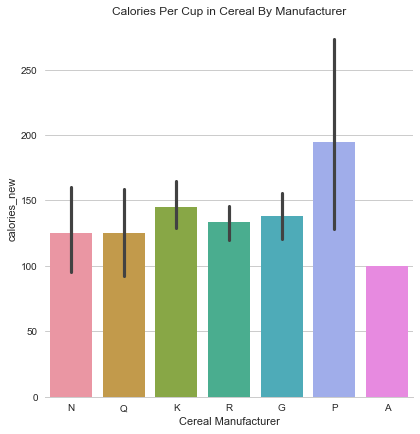

In [8]:
sns.set(style= 'whitegrid')

g = sns.factorplot(x='mfr', y='calories_new', data = cereal, size = 6, kind='bar', ci=95)
g.despine(left=True)
plt.xlabel('Cereal Manufacturer')
plt.title('Calories Per Cup in Cereal By Manufacturer')
plt.show()

The barplot helps us compare calories in cereal produced by seven different manufacturers.It can be used when we do not have too many options, otherwise the plot would be too crowded and incomprehensible. From this plot, we can see that *Post* cereal tends to have the most calories out of all manufacturers.

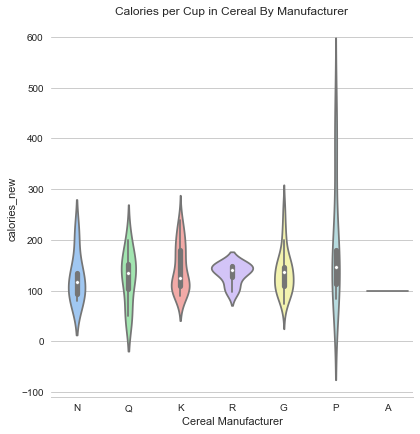

In [9]:
sns.set(style= 'whitegrid')

g = sns.factorplot(x='mfr', y='calories_new', data = cereal, size = 6, kind='violin', palette='pastel', ci=95, dodge=True, join=False)
g.despine(left=True)
plt.xlabel('Cereal Manufacturer')
plt.title('Calories per Cup in Cereal By Manufacturer')
plt.show()

The violin plot includes information about the median, interquartile range, 95% confidence interval as well as information about higher or lower probability of calorie values. 

# Continuous Variables 'Rating' And 'Sugar' Plotted in Three Different Ways

c:\users\owner\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


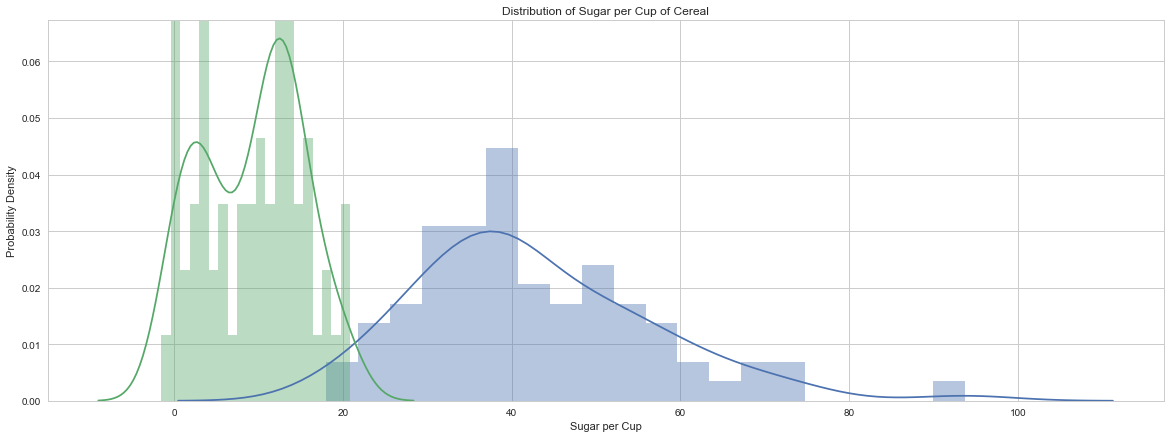

In [37]:
plt.figure(figsize=(20,7))
sns.distplot(cereal['rating'], bins =20)
plt.ylabel('Probability Density')
plt.title('Distribution of Cereal Ratings')

sns.distplot(cereal['sugars_new'], bins =20)
plt.title('Distribution of Sugar per Cup of Cereal')
plt.xlabel('Sugar per Cup')
plt.ylabel('Probability Density')
plt.show()

Disadvantages: difference in the variables is significant. This type of histogram is more appropriate for comparing populations that share similarities (e.g. sugar in soft drinks vs. sugar in fruit drinks).

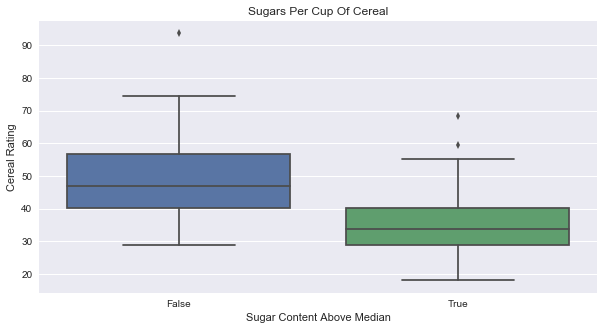

In [12]:
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
sns.boxplot(x='above_median', y='rating', data=cereal)
plt.title('Sugars Per Cup Of Cereal')
plt.ylabel('Cereal Rating')
plt.xlabel('Sugar Content Above Median')
plt.show()

The boxplots above compare cereal rating depending on whether sugar content is above or below median. This graphs is good for analyzing results depending on a condition (in our case sugar content below or above median). Yet, the graph compares the two parameters in the aggregate and does not lend us an insight into individual datapoints. 

<Figure size 720x360 with 0 Axes>

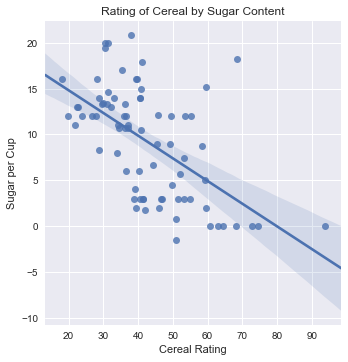

In [13]:
plt.figure(figsize=(10,5))
g = sns.lmplot(y= 'sugars_new', x='rating', data = cereal, fit_reg=True)
plt.ylabel('Sugar per Cup')
plt.xlabel('Cereal Rating')
plt.title('Rating of Cereal by Sugar Content')
plt.show()

In [14]:
cereal['rating'].corr(cereal['sugars_new'])

-0.5801527215477593

The scatter plot helps us see if there is a negative correlation between two variables, in our case sugar content and cereal rating. We can also spot outliers that have lower rating than it would be expected judging by their sugar content. Downsides: we need to have two values for the exact same entry (in our case for each cereal). Also, it is hard to interpret when we have large datasets.

c:\users\owner\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


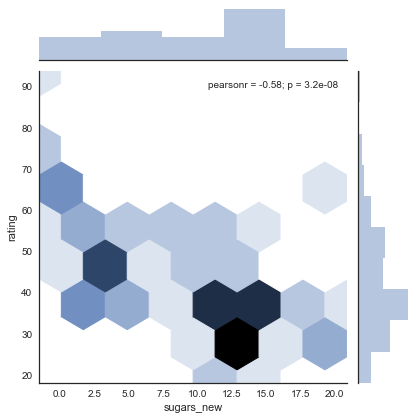

In [15]:
with sns.axes_style('white'):
    sns.jointplot('sugars_new','rating', data = cereal, kind = 'hex')

A joint histogram using hexagonal bins. Automatically includes correlation coefficient. Useful for a large number of datapoints, shows a relative number of points in each hexagonal bin. Shows a correlation.

# One Continuous Variable 'Rating' And One Categorical Variable 'Type'

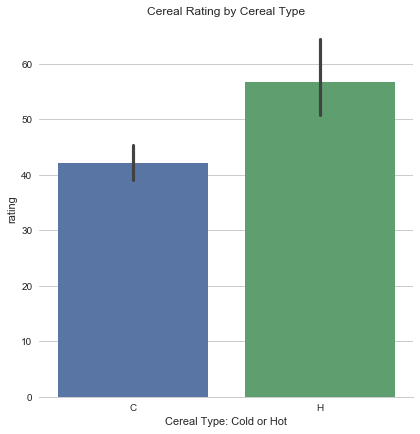

In [17]:
sns.set(style= 'whitegrid')

g = sns.factorplot(x='type', y='rating', data = cereal, size = 6, kind='bar', ci=95)
g.despine(left=True)
plt.xlabel('Cereal Type: Cold or Hot')
plt.title('Cereal Rating by Cereal Type')
plt.show()

Bars represent different categories with no particular ordering. Has information about the mean and the confidence interval but no information about the standard deviation, no distrbution.

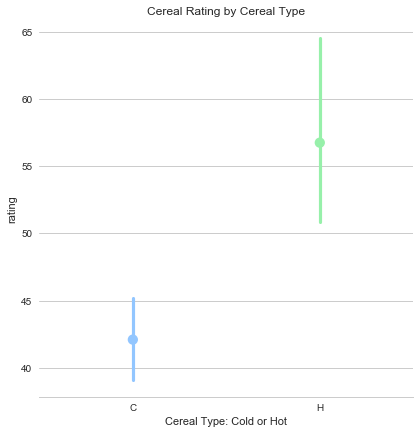

In [18]:
sns.set(style= 'whitegrid')

g = sns.factorplot(x='type', y='rating', data = cereal, size = 6, kind='point', ci=95, join=False, palette='pastel')
g.despine(left=True)
plt.xlabel('Cereal Type: Cold or Hot')
plt.title('Cereal Rating by Cereal Type')
plt.show()

Similar to barplots but better for sequence, where order is important. Joining them is generally not a good idea, only appropriate if we have a sequence (e.g. years).

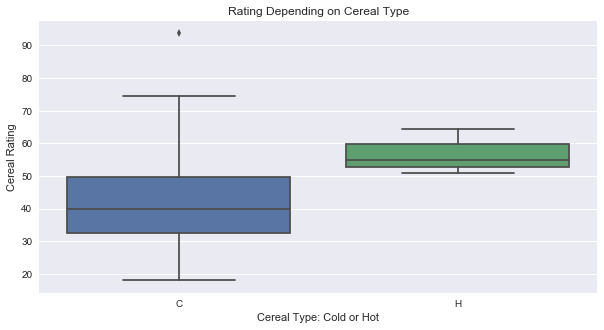

In [19]:
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
sns.boxplot(x='type', y='rating', data=cereal)
plt.title('Rating Depending on Cereal Type')
plt.ylabel('Cereal Rating')
plt.xlabel('Cereal Type: Cold or Hot')
plt.show()

The boxplot above demonstrates that there is less variation in cereal ratings for hot cereal. The median estimate for hot cereal as well as the interquartile range are higher for this cereal type. We can also spot a high outlier in the cold cereal type. Boxplots do not give us information about the number of datapoints.

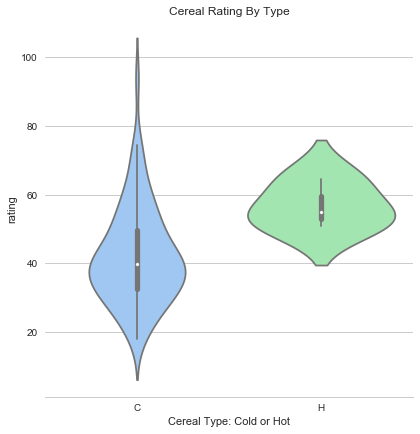

In [20]:
sns.set(style= 'whitegrid')

g = sns.factorplot(x='type', y='rating', data = cereal, size = 6, kind='violin', palette='pastel', ci=95, dodge=True, join=False)
g.despine(left=True)
plt.xlabel('Cereal Type: Cold or Hot')
plt.title('Cereal Rating By Type')
plt.show()

Violin plots have the advantages and cons of the boxplots but add probability density.

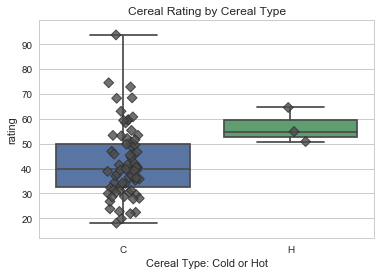

In [21]:
sns.set(style= 'whitegrid')
g = sns.boxplot(x='type', y='rating', data = cereal, whis=np.inf)
g = sns.stripplot(x='type', y='rating', data = cereal, size = 7, jitter=True, linewidth=1, marker='D', alpha=0.8, color = '0.3')
plt.xlabel('Cereal Type: Cold or Hot')
plt.title('Cereal Rating by Cereal Type')
plt.show()

Combination of boxplots with stripplots allows us to see the medians, interquarile ranges but also the relative number of datapoints. Helps us identify that hot type is very underrepresented.

In [30]:
sum(cereal['type'] =='H')

3

c:\users\owner\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


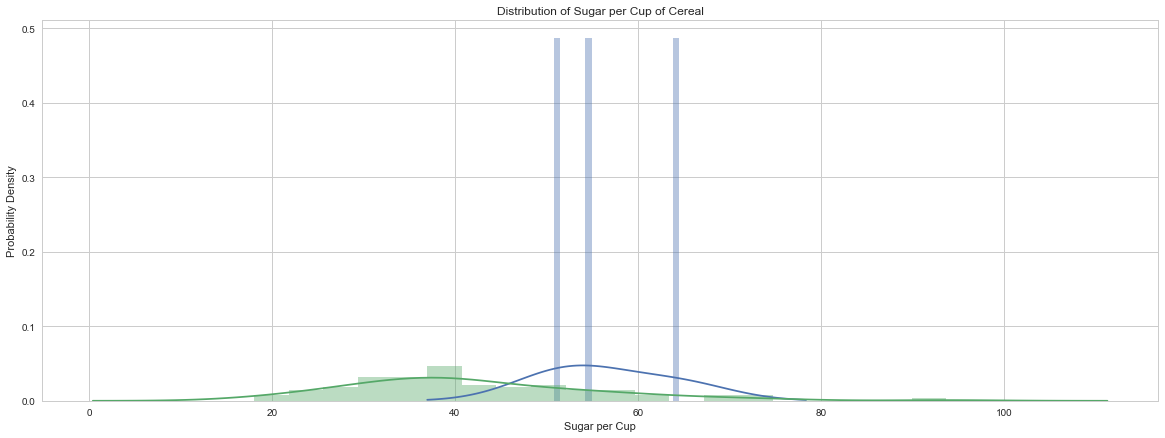

In [38]:
cold = cereal.loc[lambda df: cereal['type'] =='C', 'rating']
hot = cereal.loc[lambda df: cereal['type'] =='H', 'rating']

plt.figure(figsize=(20,7))
sns.distplot(hot, bins =20)
plt.ylabel('Probability Density')
plt.title('Distribution of ')

sns.distplot(cold, bins =20)
plt.title('Distribution of Sugar per Cup of Cereal')
plt.xlabel('Sugar per Cup')
plt.show()

This type of double histogram could be useful for comparing similar populations: sugar content in hot cereal vs. sugar content in cold cereal. Unfortunately, we have so few hot cereal entries that the histogram becomes not very useful